### Importando bibliotecas

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



#PARTE 1 - Arvore de Decisões para hobbies

Q1: Você gosta de trabalhar em equipe? (sim/não): sim
Q2: Prefere atividades ao ar livre? (sim/não): não
Q3: Gosta de lidar com números? (sim/não): não
Q4: Prefere usar habilidades artísticas? (sim/não): não
Q5: Se sente confortável com tecnologia? (sim/não): não
Q6: Gosta de resolver problemas complexos? (sim/não): não
Q7: Prefere atividades que envolvam comunicação? (sim/não): não
Q8: Se interessa por cuidar de outras pessoas? (sim/não): não
Q9: Gosta de desafios físicos? (sim/não): sim
Q10: Prefere trabalhar em ambientes organizados? (sim/não): sim


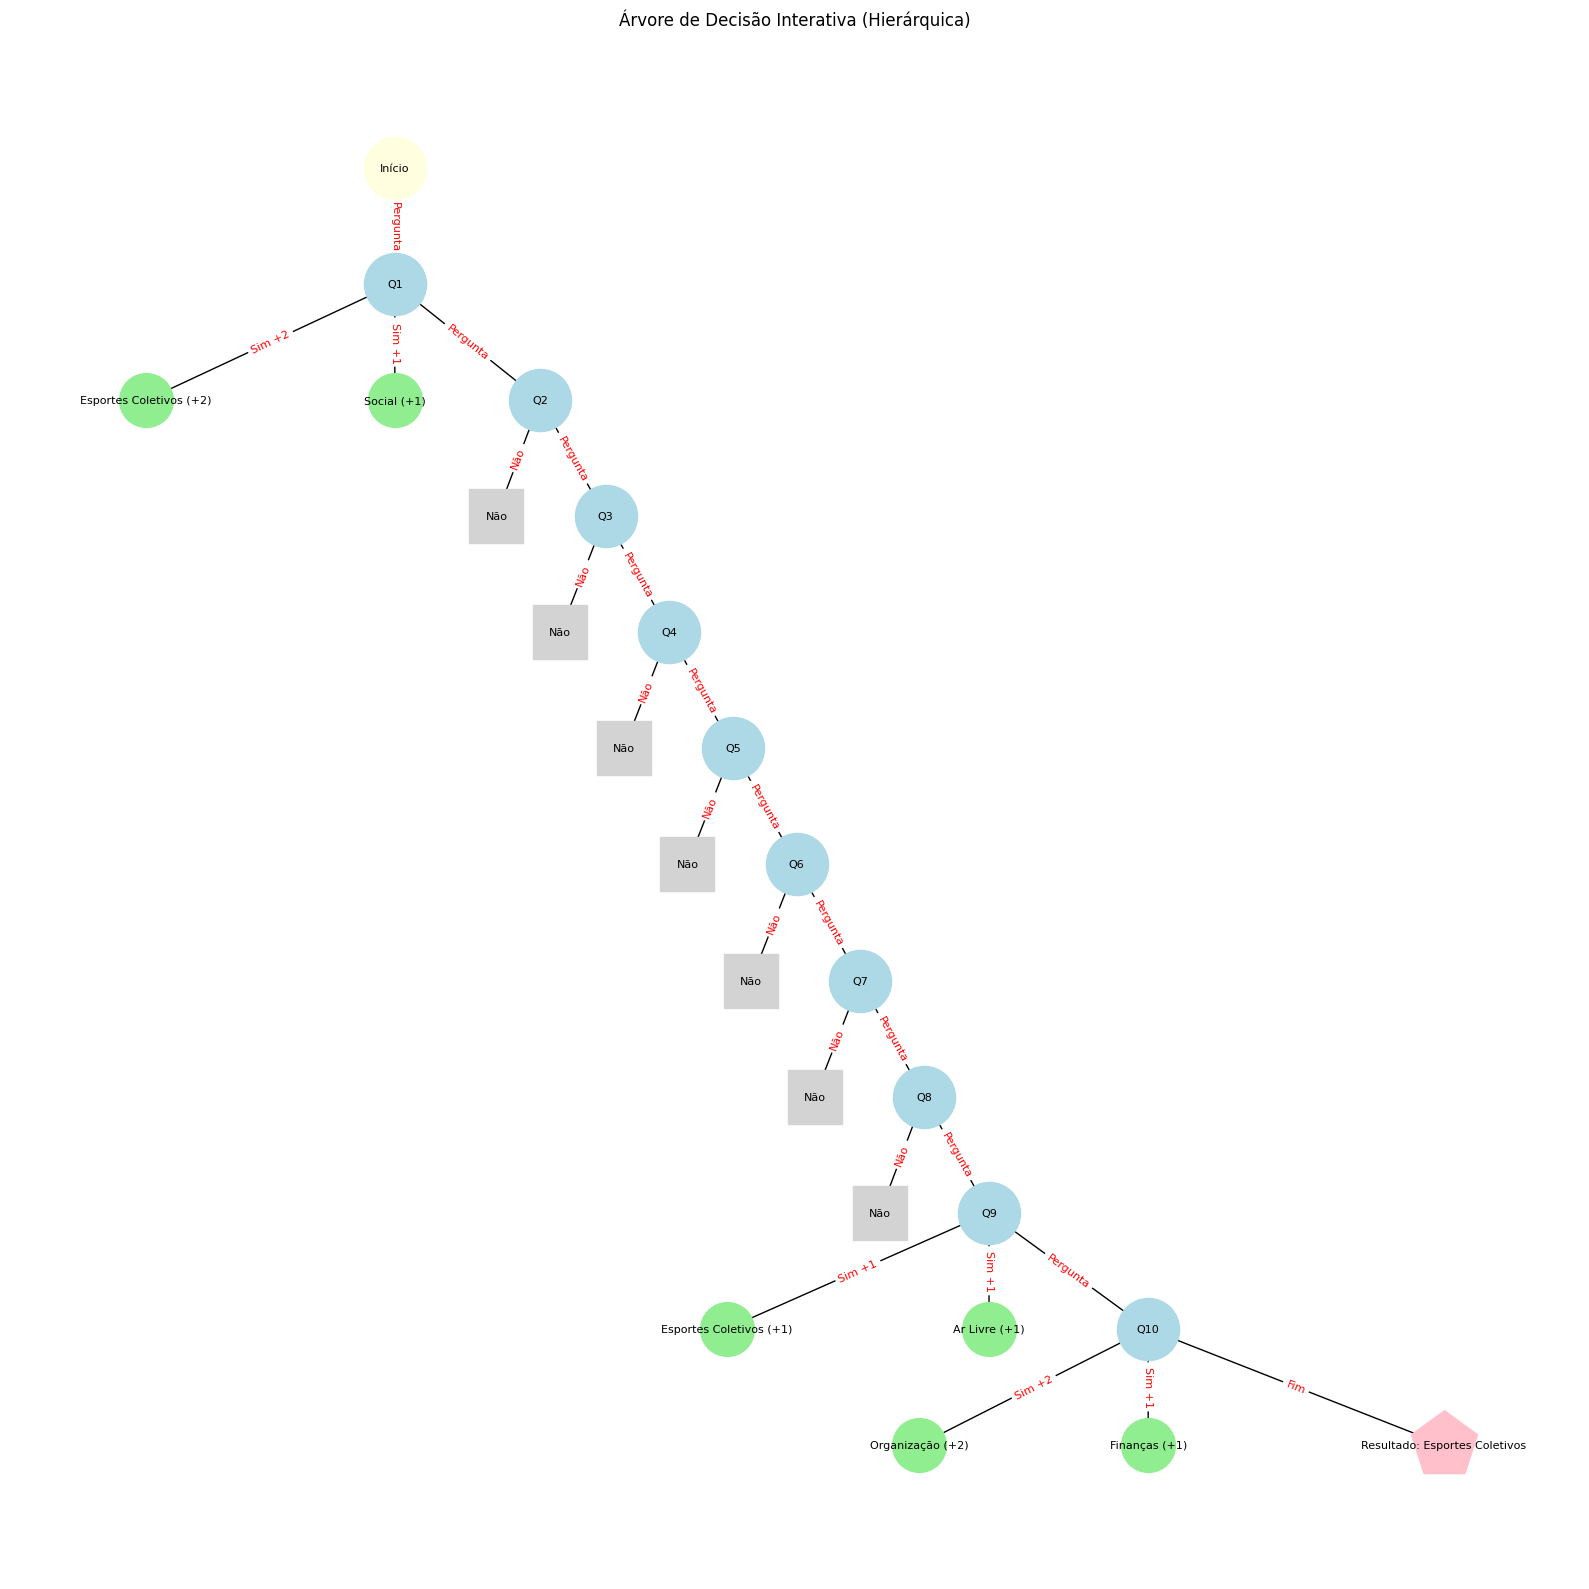


Pontuações:
Esportes Coletivos: 3
Social: 1
Ar Livre: 1
Finanças: 1
Ciência: 0
Artes: 0
Tecnologia: 0
Educação: 0
Saúde: 0
Organização: 2

Sugestão de carreira/hobby: Esportes Coletivos


In [411]:


def interactive_decision_tree():
    questions = [
        "Você gosta de trabalhar em equipe?",
        "Prefere atividades ao ar livre?",
        "Gosta de lidar com números?",
        "Prefere usar habilidades artísticas?",
        "Se sente confortável com tecnologia?",
        "Gosta de resolver problemas complexos?",
        "Prefere atividades que envolvam comunicação?",
        "Se interessa por cuidar de outras pessoas?",
        "Gosta de desafios físicos?",
        "Prefere trabalhar em ambientes organizados?"
    ]

    mapping = {
        0: [("Esportes Coletivos", "+2"), ("Social", "+1")],
        1: [("Ar Livre", "+2"), ("Esportes Coletivos", "+1")],
        2: [("Finanças", "+2"), ("Ciência", "+1")],
        3: [("Artes", "+2")],
        4: [("Tecnologia", "+2"), ("Ciência", "+1")],
        5: [("Ciência", "+2"), ("Tecnologia", "+1")],
        6: [("Educação", "+2"), ("Social", "+1")],
        7: [("Saúde", "+2"), ("Social", "+1")],
        8: [("Esportes Coletivos", "+1"), ("Ar Livre", "+1")],
        9: [("Organização", "+2"), ("Finanças", "+1")]
    }

    scores = {
        "Esportes Coletivos": 0,
        "Social": 0,
        "Ar Livre": 0,
        "Finanças": 0,
        "Ciência": 0,
        "Artes": 0,
        "Tecnologia": 0,
        "Educação": 0,
        "Saúde": 0,
        "Organização": 0
    }

    responses = []  # RESPOSTAS
    G = nx.DiGraph()

    G.add_node("Start", label="Início", type="start")
    current_node = "Start"

    for i, question in enumerate(questions):
        answer = input(f"Q{i+1}: {question} (sim/não): ").strip().lower()
        responses.append(answer)
        q_node = f"Q{i+1}"

        G.add_node(q_node, label=f"Q{i+1}", type="question")
        G.add_edge(current_node, q_node, label="Pergunta")

        if answer == "sim":
            for area, pts in mapping[i]:
                scores[area] += int(pts.strip('+'))
            for j, (area, pts) in enumerate(mapping[i]):
                outcome_node = f"{q_node}Sim{j}"
                G.add_node(outcome_node, label=f"{area} ({pts})", type="outcome")
                G.add_edge(q_node, outcome_node, label=f"Sim {pts}")
        else:

            outcome_node = f"{q_node}_Nao"
            G.add_node(outcome_node, label="Não", type="no")
            G.add_edge(q_node, outcome_node, label="Não")

        current_node = q_node

    # PLOTAGEM DA ARVORE.

    best_area = max(scores, key=scores.get)
    G.add_node("Resultado", label=f"Resultado: {best_area}", type="result")
    G.add_edge(current_node, "Resultado", label="Fim")

    pos = nx.nx_pydot.graphviz_layout(G, prog="dot")

    scale_factor = 2
    pos = {node: (coord[0]*scale_factor, coord[1]*scale_factor) for node, coord in pos.items()}

    plt.figure(figsize=(16, 16))

    nodes_start    = [n for n, d in G.nodes(data=True) if d.get("type") == "start"]
    nodes_question = [n for n, d in G.nodes(data=True) if d.get("type") == "question"]
    nodes_outcome  = [n for n, d in G.nodes(data=True) if d.get("type") == "outcome"]
    nodes_no       = [n for n, d in G.nodes(data=True) if d.get("type") == "no"]
    nodes_result   = [n for n, d in G.nodes(data=True) if d.get("type") == "result"]

    nx.draw_networkx_nodes(G, pos, nodelist=nodes_start,    node_color="lightyellow", node_shape="o", node_size=2000)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_question, node_color="lightblue",   node_shape="o", node_size=2000)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_outcome,  node_color="lightgreen",  node_shape="o", node_size=1500)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_no,       node_color="lightgray",   node_shape="s", node_size=1500)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_result,   node_color="pink",        node_shape="p", node_size=2500)

    nx.draw_networkx_edges(G, pos, arrows=True)
    node_labels = nx.get_node_attributes(G, "label")
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=8)

    plt.title("Árvore de Decisão Interativa (Hierárquica)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    print("\nPontuações:")
    for area, score in scores.items():
        print(f"{area}: {score}")
    print(f"\nSugestão de carreira/hobby: {best_area}")


interactive_decision_tree()

## Importando e tratando o csv

In [ ]:


df = pd.read_csv('../Data/20C_RELATÓRIO-DE-SÍFILIS-EM-GESTANTE2019-A-2023.csv', sep=",", encoding='latin1', engine='python', thousands='.', decimal=',')

df.drop('ID_AGRAVO', axis=1, inplace=True)
df.drop('ID_UNIDADE', axis=1, inplace=True)
df.drop('NU_IDADE_N', axis=1, inplace=True)
df.drop('ID_MN_RESI', axis=1, inplace=True)
df.drop('NU_NOTIFIC', axis=1, inplace=True)


df.dropna(subset=['TPESQUEMA'], inplace=True)
df.dropna(subset=['CS_ZONA'], inplace=True)
df.dropna(subset=['TRATPARC'], inplace=True)

print('O DataFrame possui: ')
print(df['NU_ANO'].count(), 'linhas')

df.head()

NameError: name 'determinar_semestre' is not defined

## Definindo features e treinando a árvore binária


Melhor profundidade: 1 :: acurácia -> 0.90


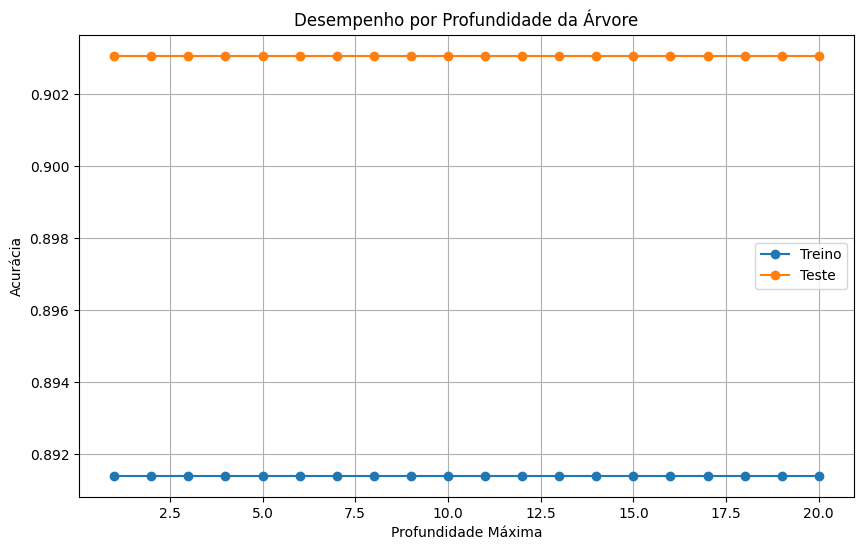


Acurácia Final :: profundidade -> 1: 0.90


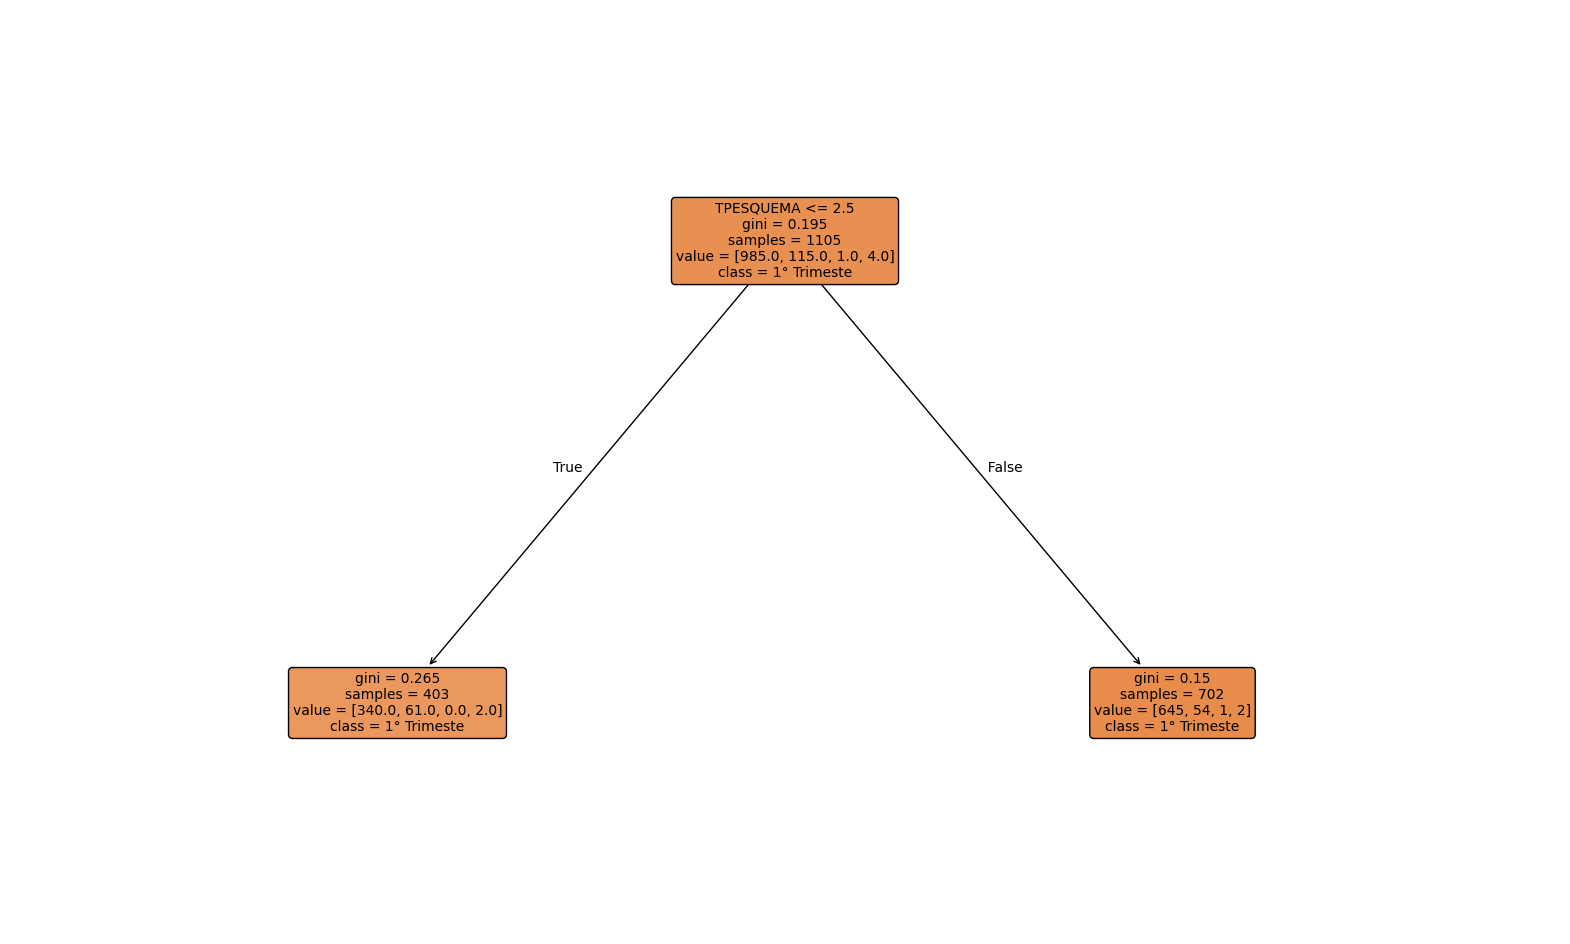


Importância das Features:
TPESQUEMA    1.0
TRATPARC     0.0
dtype: float64


In [404]:


# Deu 0.90 Acurácia recall: 0.9 e auc_roc de 0.5
features = ['TPESQUEMA']
target = 'CS_ZONA'

# Deu 0.88
features = ['TRATPARC']
target = 'CS_ZONA'

# Deu 0.88
features = ['TRATPARC', 'TPESQUEMA']
target = 'CS_ZONA'


df_encoded = pd.get_dummies(df[features])

le = LabelEncoder()
y = le.fit_transform(df[target])

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.15, random_state=102)

max_depths = range(1, 21)
test_accuracies = []
train_accuracies = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth,min_samples_split=30,min_samples_leaf=30,random_state=102)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

best_depth = max_depths[np.argmax(test_accuracies)]
print(f"\nMelhor profundidade: {best_depth} :: acurácia -> {max(test_accuracies):.2f}")

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, 'o-', label='Treino')
plt.plot(max_depths, test_accuracies, 'o-', label='Teste')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.title('Desempenho por Profundidade da Árvore')
plt.legend()
plt.grid(True)
plt.show()

clf = DecisionTreeClassifier(max_depth=best_depth,min_samples_split=30,min_samples_leaf=30,random_state=102)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"\nAcurácia Final :: profundidade -> {best_depth}: {accuracy_score(y_test, y_pred):.2f}")

if best_depth <= 5:
    plt.figure(figsize=(20,12))

    class_names = df[target].unique()
    class_name_mapping = {
      1: '1° Trimeste',
      2: '2° Trimeste',
      3: '3° Trimeste',
      4: 'Idade gestacional ignorada',
      9: 'Ignorado'
    }
    class_names_mapped = [class_name_mapping.get(name) for name in class_names]

    plot_tree(clf,
             feature_names=df_encoded.columns,
             class_names=class_names_mapped,
             filled=True,
             rounded=True,
             fontsize=10)
    plt.show()
else:
    print("\nÁrvore muito grande")

feature_importances = pd.Series(clf.feature_importances_, index=df_encoded.columns)
print("\nImportância das Features:")
print(feature_importances.sort_values(ascending=False))

## Definindo parâmetros e treinando KNN

k = 1 	 ::  Acurácia: 0.51
k = 3 	 ::  Acurácia: 0.87
k = 5 	 ::  Acurácia: 0.87
k = 7 	 ::  Acurácia: 0.87
k = 9 	 ::  Acurácia: 0.90
k = 11 	 ::  Acurácia: 0.90
k = 13 	 ::  Acurácia: 0.90
k = 15 	 ::  Acurácia: 0.90
k = 17 	 ::  Acurácia: 0.90
k = 19 	 ::  Acurácia: 0.90

Melhor valor de k, K = 9 :: acurácia de 0.90


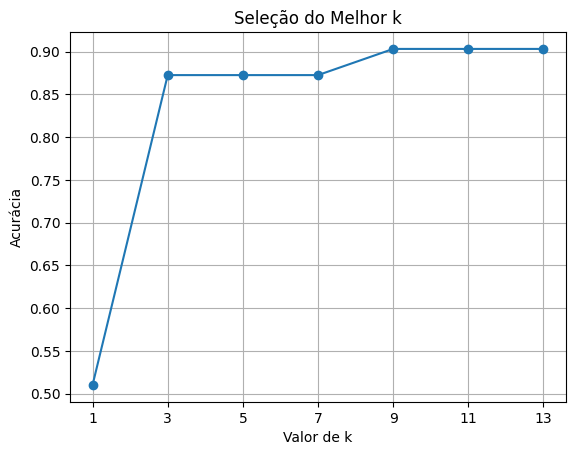

In [414]:
best_k = 0
best_accuracy = 0.0

for k in range(1, 20, 2):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)
    y_pred_knn = clf_knn.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred_knn)

    print(f"k = {k} \t ::  Acurácia: {current_accuracy:.2f}")

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_k = k

print(f"\nMelhor valor de k, K = {best_k} :: acurácia de {best_accuracy:.2f}")

k_values = list(range(1, 15, 2))
accuracies = []

for k in k_values:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf_knn.predict(X_test)))

plt.plot(k_values, accuracies, marker='o')
plt.title('Seleção do Melhor k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## Definindo parâmetros e treinando SVM

In [415]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_kernel = 'linear'
best_accuracy = 0.0
best_c = 1.0

for c in c_values:
    clf = SVC(kernel='linear', C=c, random_state=42)
    clf.fit(X_train, y_train)
    current_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"Linear com C={c:.3f} \t :: Acurácia: {current_accuracy:.2f}")

    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_c = c

other_kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in other_kernels:
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)
    current_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"Kernel: {kernel} \t\t ::  Acurácia: {current_accuracy:.2f}")

    if current_accuracy > best_accuracy + 0.1:
        best_accuracy = current_accuracy
        best_kernel = kernel

print(f"\nMelhor configuração, Kernel {best_kernel} :: Acurácia: {best_accuracy:.2f}")
if best_kernel == 'linear':
    print(f"Melhor C: {best_c}")

Linear com C=0.001 	 :: Acurácia: 0.90
Linear com C=0.010 	 :: Acurácia: 0.90
Linear com C=0.100 	 :: Acurácia: 0.90
Linear com C=1.000 	 :: Acurácia: 0.90
Linear com C=10.000 	 :: Acurácia: 0.90
Linear com C=100.000 	 :: Acurácia: 0.90
Kernel: linear 		 ::  Acurácia: 0.90
Kernel: rbf 		 ::  Acurácia: 0.90
Kernel: poly 		 ::  Acurácia: 0.90
Kernel: sigmoid 		 ::  Acurácia: 0.89

Melhor configuração, Kernel linear :: Acurácia: 0.90
Melhor C: 0.001
